In [1]:
from choice_situation_GUI import ChoiceSituationGUI
from data import read_values_and_situations, store, ChoiceSituation, Value
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def score(choices, difficulties, choice_situations : List[ChoiceSituation]):
    for i in range(len(choice_situations)):
        add = (1 - 0.5* difficulties[i])
        if choices[i] == 0 :
            choice_situations[i].value1.score += add/len(choices)
            choice_situations[i].value2.score += (1-add)/len(choices)
        if choices[i] == 1 :
            choice_situations[i].value1.score += (1-add)/len(choices)
            choice_situations[i].value2.score += add/len(choices)

def store_scores(filename, values, scores):
    dict = {"Valeur" : values, "Score" : scores}
    df = pd.DataFrame(dict)
    df.to_csv(filename)

def store_differences(filename, values, differences):
    dict = {"Valeur" : values, "Différence" : differences}
    df = pd.DataFrame(dict)
    df.to_csv(filename)

def score2(choices, difficulties, choice_situations : List[ChoiceSituation], values : List[Value]):
    for i in range(len(choice_situations)):
        nul = False
        scoreV = 0.5 + (1 - difficulties[i])/2
        scoreD = 0.5 - (1 - difficulties[i])/2
        n = len(values) - 1
        if difficulties[i] == 1.:
            nul = True
            choice_situations[i].value1.score += 1/n
            choice_situations[i].value2.score += 1/n
        if choices[i] == 0 :
            choice_situations[i].value1.difference += (scoreV - 0.5)/n
            choice_situations[i].value2.difference += (scoreD -  0.5)/n
            if not nul:
                choice_situations[i].value1.score += 3/n
        if choices[i] == 1 :
            choice_situations[i].value1.difference += (scoreD - 0.5)/n
            choice_situations[i].value2.difference += (scoreV - 0.5)/n
            if not nul:
                choice_situations[i].value2.score += 3/n

# def score3(choices, choice_situations : List[ChoiceSituation], values : List[Value]):
#     for i in range(len(choice_situations)):
#         if choices[i] == 0:
#             choice_situations[i].value1.score + 

def reset(values : List[Value]):
    for i in range(len(values)):
        values[i].difference = 0
        values[i].score = 0

In [3]:
values, values_name_only, choice_situations = read_values_and_situations("data/values.csv", "data/choice_situations.csv")

In [73]:
interface = ChoiceSituationGUI(choice_situations)
interface.mainloop()
diff = interface.difficulties
choices = interface.choices
id = interface.id
rel = interface.relevances
choices_str = []
choices_str_simple = []
for i in range(len(choices)):
    if diff[i] == 1.:
        choices_str.append(f"{choice_situations[i].value1}-{choice_situations[i].value2}")
        choices_str_simple.append(f"{choice_situations[i].value1}-{choice_situations[i].value2}")
    else :
        if choices[i] == 0 : 
            choices_str.append(f"{choice_situations[i].value1} (against {choice_situations[i].value2})")
            choices_str_simple.append(f"{choice_situations[i].value1}")
        if choices[i] == 1 : 
            choices_str.append(f"{choice_situations[i].value2} (against {choice_situations[i].value1})")
            choices_str_simple.append(f"{choice_situations[i].value2}")
store("data/responses.csv", "Id", id, "Choice", choices, "Difficulty", diff, "Relevance", rel)
store("data/responses_str.csv", "Id", id, "Choice", choices_str, "Difficulty", diff, "Relevance", rel)
store("data/responses_str_simple.csv", "Id", id, "Choice", choices_str_simple, "Difficulty", diff, "Relevance", rel)


In [5]:
print(choices_str)

['Confidentialite (against Confort)', 'Equite (against Ecologie)', 'Confort (against Equite)', 'Confidentialite (against Equite)', 'Ecologie (against Confort)', 'Ecologie (against Confidentialite)', 'Ecologie (against Securityofsupply)', 'Affordability (against Confidentialite)', 'Autonomy (against Equite)', 'Securityofsupply (against Confort)', 'Affordability (against Confort)', 'Ecologie (against Autonomy)', 'Securityofsupply (against Confidentialite)', 'Ecologie (against Affordability)', 'Autonomy (against Confidentialite)', 'Equite (against Securityofsupply)', 'Equite (against Affordability)', 'Confort (against Autonomy)', 'Autonomy (against Securityofsupply)', 'Affordability (against Autonomy)', 'Securityofsupply (against Affordability)']


In [62]:
reset(values)
score(choices, diff, choice_situations)

In [63]:
reset(values)
score2(choices, diff, choice_situations, values)

In [64]:
responses = pd.read_csv('data/responses.csv')
responses_str = pd.read_csv('data/responses_str.csv')
print(responses_str)

    Unnamed: 0    Id                                      Choice  Difficulty  \
0            0   1.0           Confidentialite (against Confort)    1.000000   
1            1   2.0                   Equite (against Ecologie)    1.000000   
2            2   3.0                    Equite (against Confort)    1.000000   
3            3   4.0            Confidentialite (against Equite)    1.000000   
4            4   5.0                  Ecologie (against Confort)    1.000000   
5            5   6.0          Confidentialite (against Ecologie)    1.000000   
6            6   7.0         Securityofsupply (against Ecologie)    1.000000   
7            7   8.0     Affordability (against Confidentialite)    1.000000   
8            8   9.0                   Autonomy (against Equite)    1.000000   
9            9  10.0          Securityofsupply (against Confort)    1.000000   
10          10  11.0             Confort (against Affordability)    1.000000   
11          11  12.0                 Aut

In [65]:
computed_scores = np.zeros(len(values))
for i in range(len(values)):
    computed_scores[i] = values[i].get_score()
store_scores("data/scores.csv", values, computed_scores)

In [66]:
differences = np.zeros(len(values))
for i in range(len(values)):
    differences[i] = values[i].get_difference()
store_differences("data/differences.csv", values, differences)

   Unnamed: 0            Valeur     Score
0           0            Equite  1.333333
1           1           Confort  0.833333
2           2          Ecologie  0.666667
3           3   Confidentialite  0.833333
4           4          Autonomy  1.500000
5           5  Securityofsupply  1.666667
6           6     Affordability  1.166667


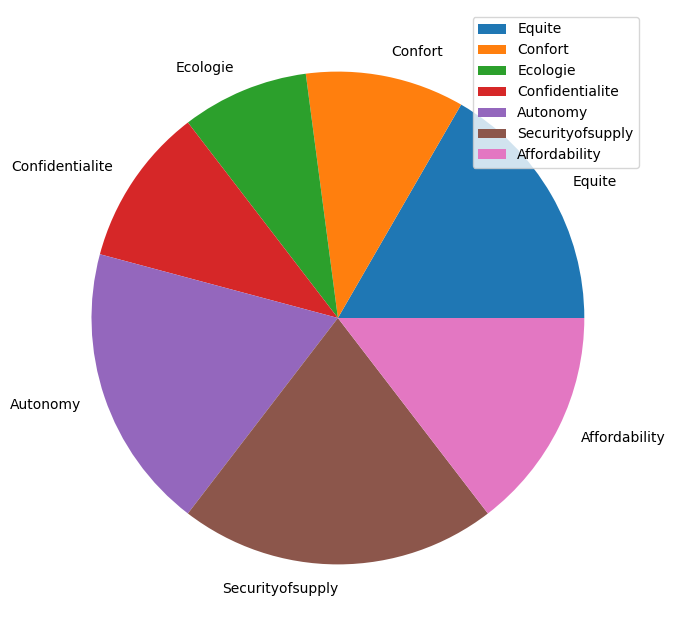

In [67]:
scores = pd.read_csv('data/scores.csv')
print(scores)
d = pd.read_csv('data/differences.csv')
plt.figure(figsize = (8, 8))
plt.pie(computed_scores, labels=values_name_only)
plt.legend()
plt.show()

In [68]:
print(responses_str)
print(scores)
print(d)

    Unnamed: 0    Id                                      Choice  Difficulty  \
0            0   1.0           Confidentialite (against Confort)    1.000000   
1            1   2.0                   Equite (against Ecologie)    1.000000   
2            2   3.0                    Equite (against Confort)    1.000000   
3            3   4.0            Confidentialite (against Equite)    1.000000   
4            4   5.0                  Ecologie (against Confort)    1.000000   
5            5   6.0          Confidentialite (against Ecologie)    1.000000   
6            6   7.0         Securityofsupply (against Ecologie)    1.000000   
7            7   8.0     Affordability (against Confidentialite)    1.000000   
8            8   9.0                   Autonomy (against Equite)    1.000000   
9            9  10.0          Securityofsupply (against Confort)    1.000000   
10          10  11.0             Confort (against Affordability)    1.000000   
11          11  12.0                 Aut

In [69]:
def seuil(v : Value):
    return (2*v.score + 3*v.difference + 2)/10

seuils = np.zeros(len(values))
for i in range(len(values)):
    seuils[i] = seuil(values[i])

[0.47083333 0.3625     0.28333333 0.34166667 0.525      0.5625
 0.45416667]


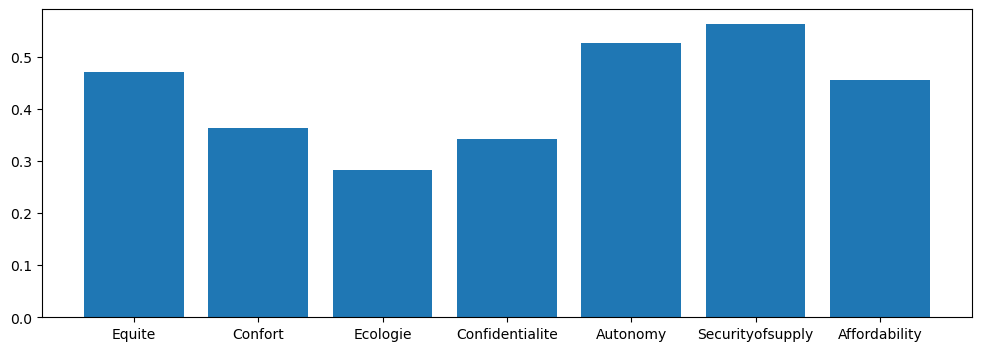

In [72]:
print(seuils)
plt.figure(figsize = (12, 4))
plt.bar(values_name_only, seuils)
plt.show()